Import thư viện

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Tạo dữ liệu nhị phân (2 lớp)

In [2]:
np.random.seed(0)
n = 100
X_class0 = np.random.randn(n, 2) + np.array([-2, -2])
X_class1 = np.random.randn(n, 2) + np.array([2, 2])
X = np.vstack((X_class0, X_class1))
y = np.array([0]*n + [1]*n).reshape(-1, 1)

Hàm sigmoid

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Khởi tạo tham số

In [4]:
w = np.zeros((X.shape[1], 1))
b = 0.0
lr = 0.1
epochs = 1000

Huấn luyện bằng gradient descent

B1: Tính z giống như công thức tính linear regression
B2: Đưa z qua hàm sigmoid để biểu diễn dữ liệu trong khoảng từ 0 đến 1 (dạng xác suất)
B3: Tính loss bằng cross entropy loss
B4: Tính đạo hàm riêng (gradient) với tham số w và b
B5: Cập nhật lại w và b bằng gradient
Lặp lại 5 bước trên

In [5]:
losses = []
for epoch in range(epochs):
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    loss = -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
    losses.append(loss)
    dw = np.dot(X.T, (y_pred - y)) / len(y)
    db = np.sum(y_pred - y)
    w -= lr * dw
    b -= lr * db
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')
print ("Final weights: ", w.ravel())
print ("Final bias: ", b)

Epoch 0, Loss: 0.6931471805599435
Epoch 100, Loss: 0.032168905590350814
Epoch 200, Loss: 0.02251920382386028
Epoch 300, Loss: 0.018061541455908103
Epoch 400, Loss: 0.015378149003527894
Epoch 500, Loss: 0.013542300118603762
Epoch 600, Loss: 0.012187223293700812
Epoch 700, Loss: 0.011135351678101197
Epoch 800, Loss: 0.01028901412421391
Epoch 900, Loss: 0.00958950221908173
Final weights:  [2.06659962 2.22873772]
Final bias:  -0.5138174602922185


Đặt ngưỡng nếu lớn hơn hoặc bằng 0.5 thì gán class 1, dưới 0.5 gán class 0
Tiếp theo tính accuracy bằng công thức (TP + TN) / All

In [6]:
y_pred_labels = (y_pred >= 0.5).astype(int)
accuracy = np.mean(y_pred_labels == y)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


Vẽ biểu đồ trực quan

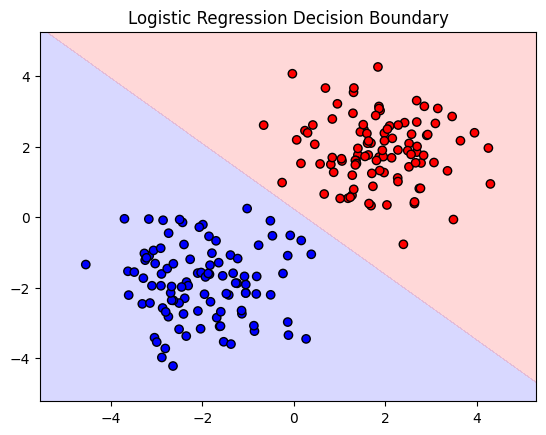

In [7]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                       np.linspace(x2_min, x2_max, 100))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = sigmoid(grid.dot(w) + b).reshape(xx1.shape)

plt.contourf(xx1, xx2, probs, levels=[0, 0.5, 1], alpha=0.3, cmap="bwr")
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap="bwr", edgecolor="k")
plt.title("Logistic Regression Decision Boundary")
plt.show()

Biểu đồ loss trong quá trình huấn luyện

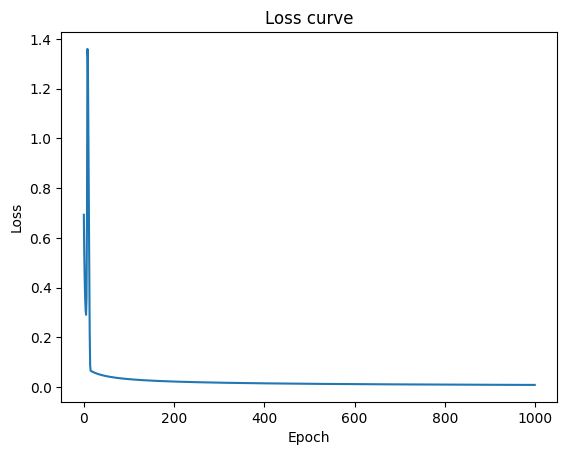

In [8]:
plt.plot(losses)
plt.title("Loss curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()